###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Γεωργία Μπουσμπουκέα

Α.Μ.:03119059

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/Dataset/train-val.csv'
df=pd.read_csv(path, parse_dates=["Date"])

Mounted at /content/drive


1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [2]:
path='/content/drive/MyDrive/Dataset/test.csv'
df_test=pd.read_csv(path, parse_dates=["Date"], dayfirst=True)

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

##2α.
Χρησιμοποιώ την μέθοδο shape για ένα dataframe, που επιστρέφει το πλήθος γραμμών και στήλων, δηλαδή υπάρχουν 48423 δείγματα και 24 χαρακτηριστικά στο dataset.

In [3]:
df.shape

(48423, 24)

##2b.
Χρησιμοποιώ την μέθοδο dtypes, που επιστρέφει το dtype για κάθε στήλη του dataframe.

In [4]:
df.dtypes

id                        int64
Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
dtype: object

##2γ.
Χρησιμοποιώ την μέθοδο columns που επιστρέφει το label για κάθε στήλη του dataframe.

In [5]:
df.columns

Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##2δ.

Θεωρώ ως κατηγορίες το αν θα βρέξει αύριο ή όχι (RainTomorrow=1/0 αντίστοιχα). Άρα έχω 2 κατηγορίες. Επιβεβαιώνω ότι δεν υπάρχει null τιμή σε αυτή τη στήλη.

In [6]:
df['RainTomorrow'].isna().sum()

0

##2ε.
Βλέπω το πλήθος των δειγμάτων για τις διαφορετικές τιμές.

In [7]:
df['RainTomorrow'].value_counts()

0.0    37364
1.0    11059
Name: RainTomorrow, dtype: int64

##2στ.


<ipython-input-8-a7503b478fc7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().round(2)


,id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
id,1.00,0.10,0.14,-0.02,0.10,0.08,0.05,0.06,0.04,-0.13,-0.09,-0.10,-0.11,-0.07,-0.07,0.14,0.12,-0.00,-0.00
MinTemp,0.10,1.00,0.72,0.10,0.46,0.05,0.16,0.19,0.18,-0.23,0.02,-0.37,-0.39,0.07,0.01,0.89,0.68,0.07,0.08
MaxTemp,0.14,0.72,1.00,-0.10,0.59,0.47,0.01,0.00,0.05,-0.49,-0.50,-0.22,-0.33,-0.30,-0.31,0.88,0.98,-0.25,-0.18
Rainfall,-0.02,0.10,-0.10,1.00,-0.07,-0.21,0.16,0.10,0.07,0.22,0.26,-0.18,-0.13,0.20,0.16,-0.01,-0.11,0.53,0.24
Evaporation,0.10,0.46,0.59,-0.07,1.00,0.35,0.19,0.21,0.15,-0.52,-0.39,-0.23,-0.26,-0.19,-0.19,0.56,0.57,-0.19,-0.12
Sunshine,0.08,0.05,0.47,-0.21,0.35,1.00,-0.05,-0.00,0.06,-0.47,-0.63,0.08,0.01,-0.69,-0.71,0.29,0.49,-0.31,-0.44
WindGustSpeed,0.05,0.16,0.01,0.16,0.19,-0.05,1.00,0.63,0.72,-0.21,0.00,-0.49,-0.43,0.09,0.13,0.12,-0.02,0.19,0.26
WindSpeed9am,0.06,0.19,0.00,0.10,0.21,-0.00,0.63,1.00,0.54,-0.29,-0.02,-0.27,-0.21,0.04,0.07,0.14,-0.01,0.12,0.12
WindSpeed3pm,0.04,0.18,0.05,0.07,0.15,0.06,0.72,0.54,1.00,-0.17,-0.00,-0.33,-0.29,0.05,0.03,0.17,0.03,0.10,0.11
Humidity9am,-0.13,-0.23,-0.49,0.22,-0.52,-0.47,-0.21,-0.29,-0.17,1.00,0.64,0.12,0.17,0.44,0.35,-0.47,-0.48,0.33,0.24


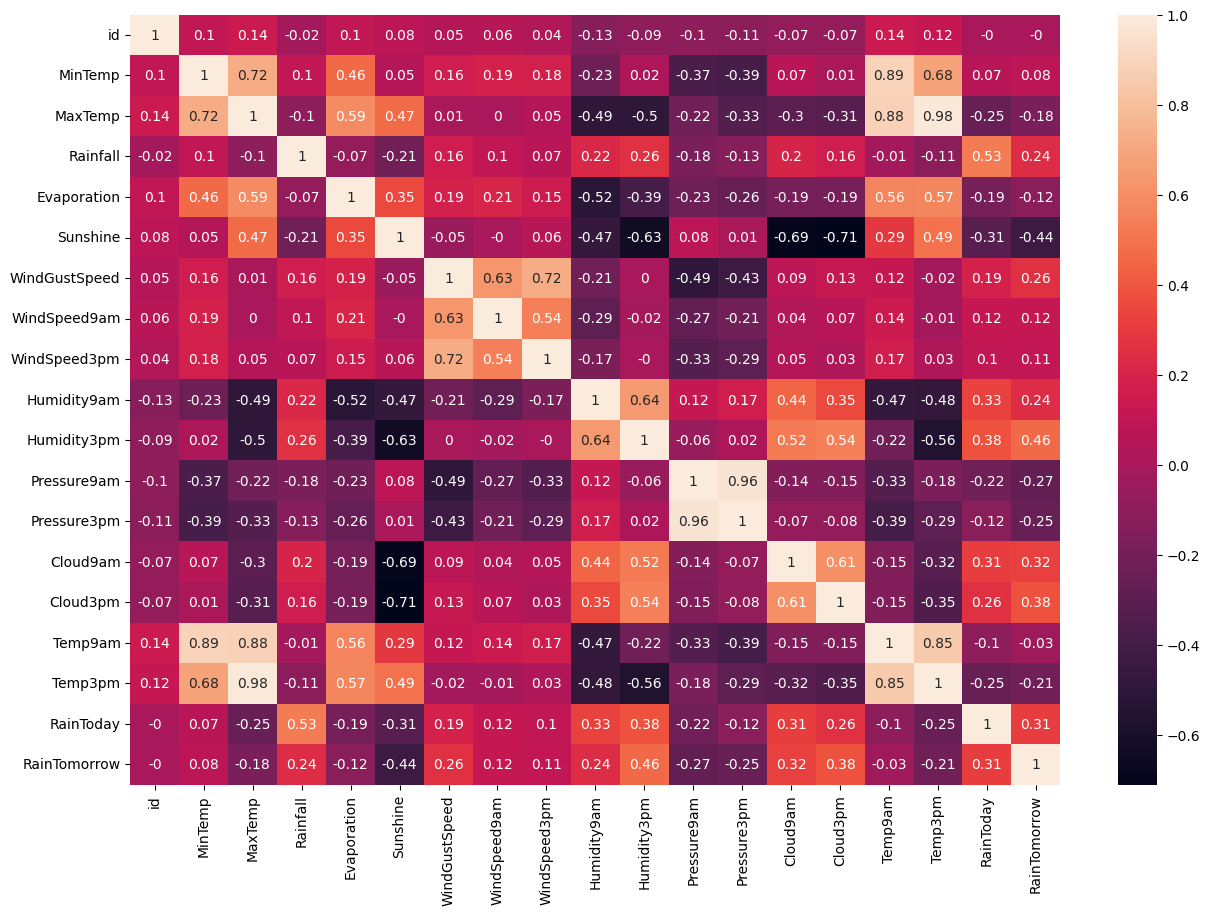

In [8]:
corr=df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True)
corr

##2ζ.
Γενικές πληροφορίες για τα δεδομένα:

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'RainToday'}>,
        <Axes: title={'center': 'RainTomorrow'}>]], dtype=object)

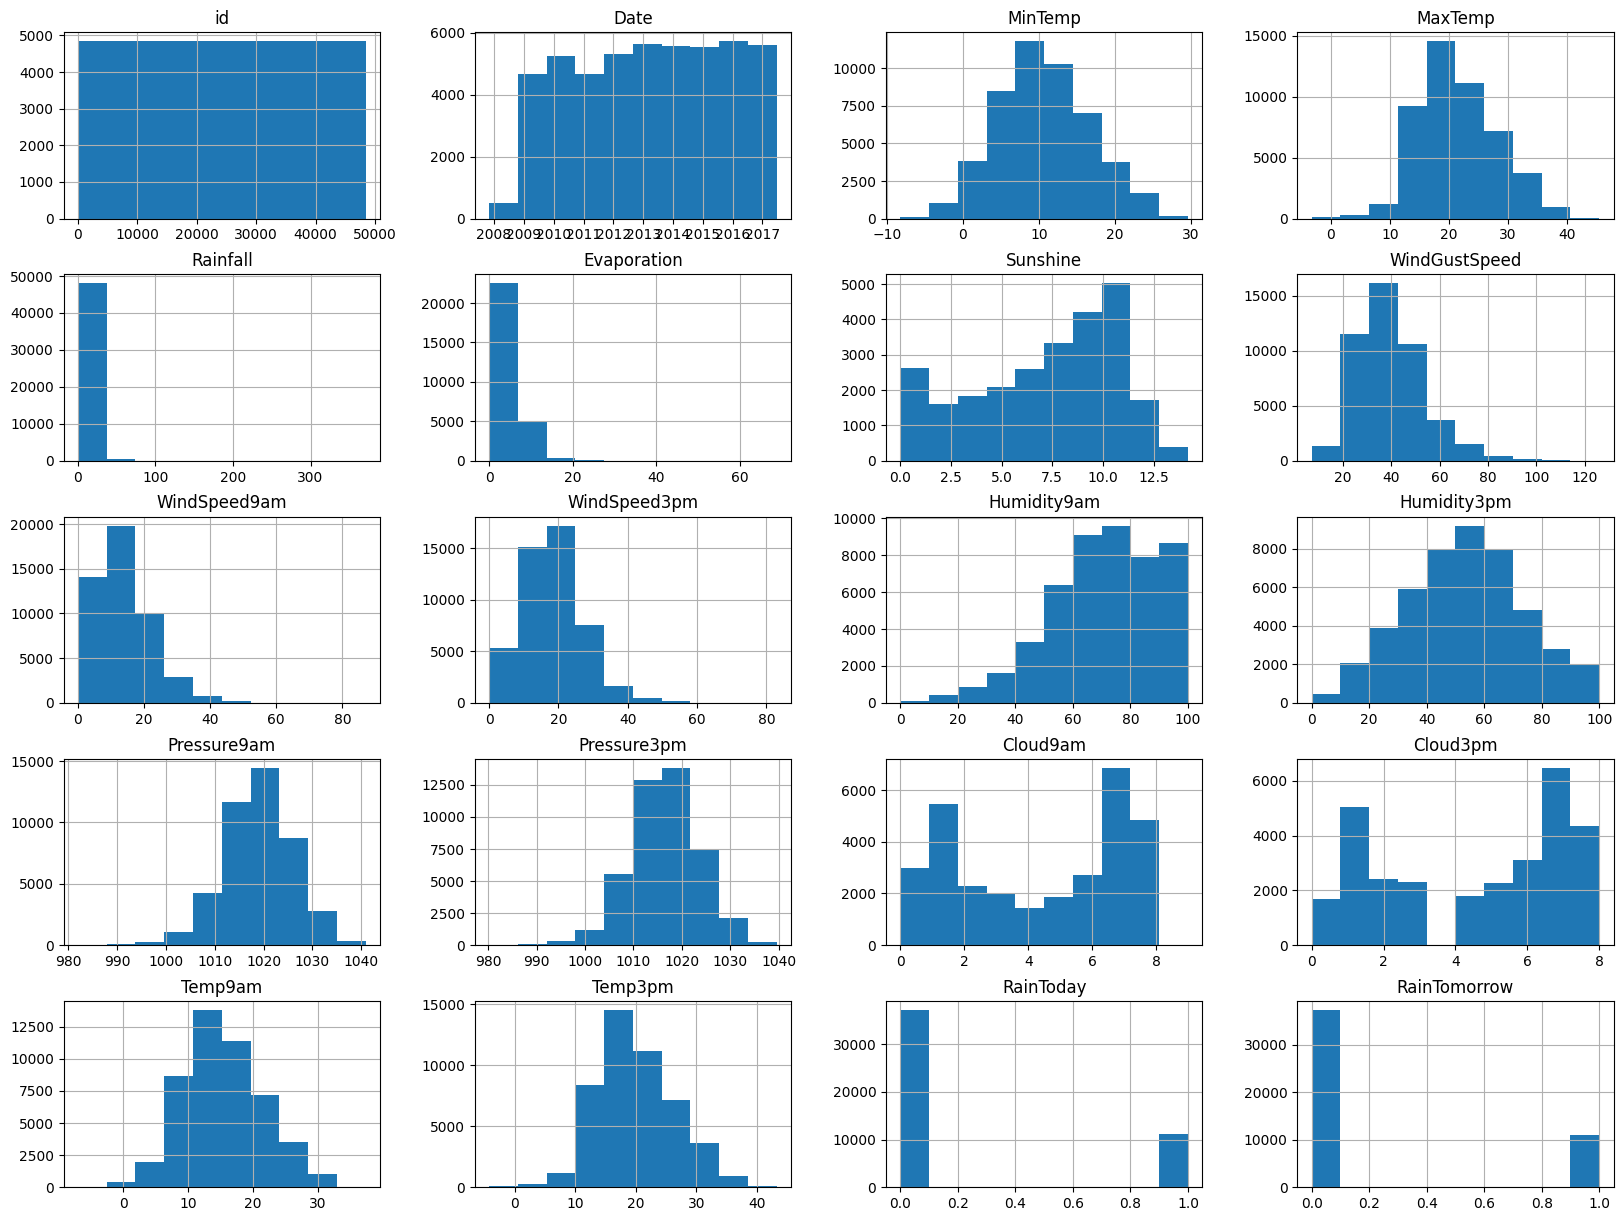

In [9]:
df.hist(bins=10, figsize=(20, 15))

Παρατηρώ πως υπάρχουν κάποιες ακραίες τιμές, τις οποίες θα μπορούσα να αφαιρέσω. Ακόμη η κλάση RainTomorrow=1 είναι πολύ μικρότερη από την RainTomorrow=0.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


Παρατηρώ ότι η στήλη 'Evaporation' έχει σχεδόν τις μισές τιμές null, οπότε θα την αφαιρέσω. Το ίδιο ισχύει για την 'Sunshine', ωστόσο αυτήν θα την χειριστώ διαφορετικά, διότι έχει υψηλή συσχέτιση με την target class. Θα αφαιρέσω ακόμη το id, που δεν προσφέρει κάτι.

Επίσης θα εκμεταλλευτώ την υψηλη συσχέτιση μεταξύ κάποιων χαρακτηριστικών: MinTemp-Temp9am, MaxTemp-Temp9am, MaxTemp-Temp3pm, Temp9am-Temp3pm, Pressure9am-Pressure3pm. Αυτό θα το κάνω κάνοντας drop κάποιες από αυτές τις στήλες (αυτές με την μικρότερη συσχέτιση με την target class).

Το χαρακτηριστικό Date θα το χειριστώ κρατώντας μόνο τον μήνα για κάθε ημερομηνία, καθώς θεωρώ πως είναι το πιο σχετικό με τον καιρό.

In [10]:
droppers= ['id', 'Date', 'Evaporation', 'MinTemp', 'Temp9am', 'Pressure3pm' ]

#first=df['Date'].dt.day
second=df['Date'].dt.month
#third=df['Date'].dt.year

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [11]:
df.isnull().sum()

id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64

Τις null τιμές μπορώ να τις χειριστώ γεμίζοντας είτε με mode, median ή mean τιμή είτε με την προηγούμενη (ή επόμενη) not null τιμή. Καθώς πρόκειται για ένα πρόβλημα, όπου τα δείγματα έχουν κάποια χρονική συσχέτιση και εποχικότητα, επιλέγω τον δεύτερο τρόπο (δηλ. αν μία μέρα  έχω χαμηλή θερμοκρασία, το πιο πιθανό είναι να ισχύει το ίδιο για την επόμενη). Θα θέσω τις πρώτες τιμές των Cloud9am, Cloud3pm χειροκίνητα, καθώς είναι null.

Για το Sunshine, που έχει πολλά null, θα χρησιμοποιήσω τον median.

In [12]:
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)

df.at[0, 'Cloud9am']=8
df.at[0, 'Cloud3pm']=8
df.fillna(method='ffill', inplace=True)

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Οι κατηγορικές μεταβλητές που έχουμε είναι Location, WindGustDir, WindDir9am, WindDir3pm. Θα χρησιμοποιήσω Ordinal Encoding.

In [13]:
categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
imputable=[column for column in df.columns if column not in droppers]
numerical=[column for column in imputable if column not in categorical]

enc_dr=make_column_transformer(
    (OrdinalEncoder(), categorical),
    ('passthrough', numerical),
    ('drop', droppers)
)

display(enc_dr)

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm']),
                                ('passthrough', 'passthrough',
                                 ['MaxTemp', 'Rainfall', 'Sunshine',
                                  'WindGustSpeed', 'WindSpeed9am',
                                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                  'Pressure9am', 'Cloud9am', 'Cloud3pm',
                                  'Temp3pm', 'RainToday', 'RainTomorrow']),
                                ('drop', 'drop',
                                 ['id', 'Date', 'Evaporation', 'MinTemp',
                                  'Temp9am', 'Pressure3pm'])])

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

Η κλιμάκωση βελτιώνει κάποιου είδους ταξινομητές, όπως τον knn και τον svc.

In [14]:
passers=['RainTomorrow']
col=['Month']+[column for column in df.columns if column not in droppers]
scalable=[column for column in col if column not in passers]

scl=make_column_transformer(
    (StandardScaler(), scalable),
    ('passthrough', passers),
)
display(scl)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Month', 'Location', 'MaxTemp', 'Rainfall',
                                  'Sunshine', 'WindGustDir', 'WindGustSpeed',
                                  'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
                                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                  'Pressure9am', 'Cloud9am', 'Cloud3pm',
                                  'Temp3pm', 'RainToday']),
                                ('passthrough', 'passthrough',
                                 ['RainTomorrow'])])

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

Εφαρμόζω τον transformer για τον encoding και το drop, προσθέτω το feature 'Month' και εφαρμόζω τον transformer για το scale. Στα χαρακτηριστικά που είχαν υψηλή συσχέτιση με το RainTomorrow επιλέγω να δώσω ένα μεγαλύτερο βάρος.

In [15]:
df_valid=enc_dr.fit_transform(df)
df_valid=pd.DataFrame(df_valid, columns=categorical+numerical)
df_valid=df_valid[imputable] #κρατάω την αρχική διάταξη
#trans2.insert(0, 'Day', first)
df_valid.insert(0, 'Month', second)
#trans2.insert(2, 'Year', third)

df_valid=scl.fit_transform(df_valid)
df_valid=pd.DataFrame(df_valid, columns=scalable+passers)
df_valid=df_valid[col]

df_valid = df_valid.astype(float)  #είχαν μετατραπεί σε object, θέλω αριθμητικά για την ταξινόμηση
print(df_valid.isnull().sum())

sunshine_index = df_valid.columns.get_loc('Sunshine')
df_valid.iloc[:, sunshine_index] *= 1.5
humidity3pm_index = df_valid.columns.get_loc('Humidity3pm')
df_valid.iloc[:, humidity3pm_index] *= 1.5
rain_today_index = df_valid.columns.get_loc('RainToday')
df_valid.iloc[:, rain_today_index] *= 1.5

print(df_valid.head(5))

Month            0
Location         0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
      Month  Location   MaxTemp  Rainfall  Sunshine  WindGustDir  \
0 -1.515409 -1.529338  0.095890 -0.273618  0.249228     1.265135   
1 -1.515409 -1.529338  0.080642 -0.300728  0.249228     0.839108   
2 -1.515409 -1.529338  1.574967 -0.300728  0.249228    -0.651987   
3 -1.515409 -1.529338  1.605463 -0.300728  0.249228    -0.865001   
4 -1.515409 -1.529338  1.376740 -0.138069  0.249228    -0.865001   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       1.320624    1.216972    1.342434      1.375163      1.623826   
1       0.822351    1.657251    1.123983      0.593829      1.623826   
2

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [16]:
X=df_valid.iloc[:, 0:18]
y=df_valid.iloc[:, -1:]
print(X.head(5))
print(y.head(5))

      Month  Location   MaxTemp  Rainfall  Sunshine  WindGustDir  \
0 -1.515409 -1.529338  0.095890 -0.273618  0.249228     1.265135   
1 -1.515409 -1.529338  0.080642 -0.300728  0.249228     0.839108   
2 -1.515409 -1.529338  1.574967 -0.300728  0.249228    -0.651987   
3 -1.515409 -1.529338  1.605463 -0.300728  0.249228    -0.865001   
4 -1.515409 -1.529338  1.376740 -0.138069  0.249228    -0.865001   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       1.320624    1.216972    1.342434      1.375163      1.623826   
1       0.822351    1.657251    1.123983      0.593829      1.623826   
2      -1.028380    0.556553   -0.842076     -0.857219     -0.150456   
3       0.822351   -1.204565   -1.715880     -1.303696     -1.592061   
4       0.395259   -0.764286   -1.060527      0.147353      0.071329   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm   Temp3pm  \
0    -0.721260    -1.959426    -0.670768  1.091317  1.219844  0.288989   
1    -0.56

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [18]:
# Initialize classifier:
gnb = GaussianNB()

knn = KNeighborsClassifier() #default k value is 5

lreg = LogisticRegression(max_iter=800, random_state=4) #αλλάζω την default τιμή γιατί μου έβγαζε "TOTAL NO. of ITERATIONS REACHED LIMIT "
                                                        #ok γιατί έχω binary classification

mlp=MLPClassifier(hidden_layer_sizes=(100,), random_state=4) #ένα κρυφό επίπεδο με 100 νευρώνες -> είναι η default τιμή

svc=svm.SVC(random_state=4)

dec_tree = DecisionTreeClassifier(random_state=4)

rndf = RandomForestClassifier(random_state=4)

classifiers=[gnb, knn, lreg, mlp, svc, dec_tree, rndf]
for clf in classifiers:
  clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [19]:
print("Labels from test set ",y_test.T.to_numpy()[0][:10])

predictions={}
for clf in classifiers:
  predictions[clf]=clf.predict(X_test)
  print("Labels' prediction", clf, "is", predictions[clf][:10])

Labels from test set  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels' prediction GaussianNB() is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Labels' prediction KNeighborsClassifier() is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Labels' prediction LogisticRegression(max_iter=800, random_state=4) is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels' prediction MLPClassifier(random_state=4) is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels' prediction SVC(random_state=4) is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Labels' prediction DecisionTreeClassifier(random_state=4) is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Labels' prediction RandomForestClassifier(random_state=4) is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [20]:
f1_scores={}
for clf in classifiers:
  f1_scores[clf]=metrics.f1_score(y_test, predictions[clf], average=None)
  print("F1 score of", clf, "is", f1_scores[clf])

F1 score of GaussianNB() is [0.8650043  0.57122323]
F1 score of KNeighborsClassifier() is [0.89539713 0.5713283 ]
F1 score of LogisticRegression(max_iter=800, random_state=4) is [0.90423995 0.59137056]
F1 score of MLPClassifier(random_state=4) is [0.90480889 0.61361658]
F1 score of SVC(random_state=4) is [0.91033032 0.5970883 ]
F1 score of DecisionTreeClassifier(random_state=4) is [0.85907604 0.533175  ]
F1 score of RandomForestClassifier(random_state=4) is [0.91288844 0.62677337]


Ο καλύτερο ταξινομητής φαίνεται να είναι ο Random Forest. Παρατηρώ ότι το f1 είναι σημαντικό μικρότερο σε κάθε περίπτωση για την κλάση RainTomorrow=0, και αυτό οφείλεται στο ότι είναι σημαντικά μικρότερη.

Confusion matrix:
[[10752   515]
 [ 1537  1723]]


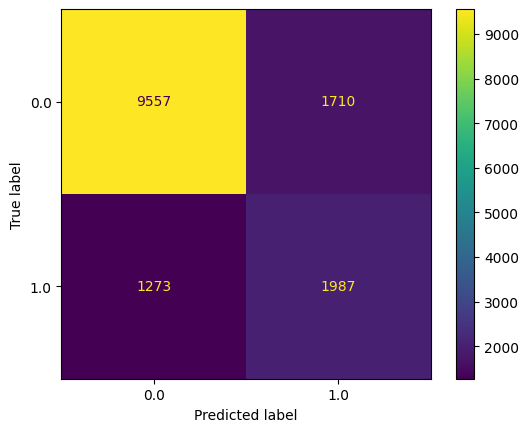

In [21]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions[rndf]))
_ = metrics.ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


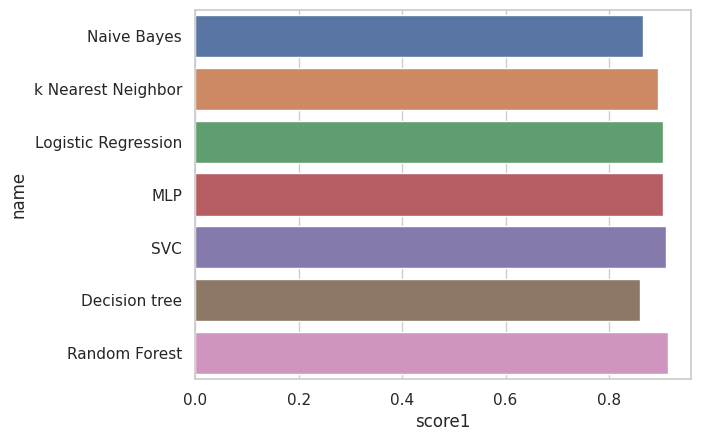

In [22]:
df_sc=pd.DataFrame()
scores1=[f1_scores[gnb][0], f1_scores[knn][0], f1_scores[lreg][0], f1_scores[mlp][0], f1_scores[svc][0], f1_scores[dec_tree][0], f1_scores[rndf][0]]
scores2=[f1_scores[gnb][1], f1_scores[knn][1], f1_scores[lreg][1], f1_scores[mlp][1], f1_scores[svc][1], f1_scores[dec_tree][1], f1_scores[rndf][1]]
names=['Naive Bayes', 'k Nearest Neighbor','Logistic Regression', 'MLP', 'SVC', 'Decision tree', 'Random Forest']
df_sc['name']=names
df_sc['score1']=scores1
df_sc['score2']=scores2
sns.set(style='whitegrid')
ax=sns.barplot(y="name", x="score1", data=df_sc)

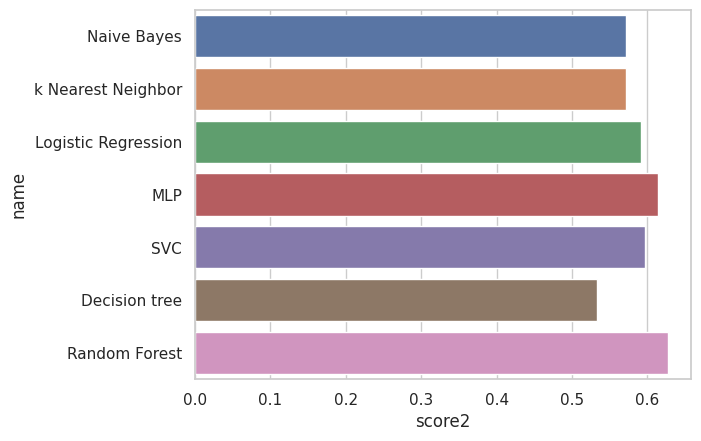

In [23]:
ax=sns.barplot(y="name", x="score2", data=df_sc)

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/18PMqdPSuJ4CurrzYlahooNMJWZ_8n11o/view?usp=sharing).


Αρχικά θα κάνω τις ίδιες μετατροπές με πριν στο test set.

In [24]:
droppers= [ 'Date', 'Evaporation', 'MinTemp', 'Temp9am', 'Pressure3pm' ]
imputable=[column for column in df_test.columns if column not in droppers]
col=['Month']+[column for column in df_test.columns if column not in droppers]
categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
numerical=[column for column in imputable if column not in categorical]
passers=[]
scalable=[column for column in col if column not in passers]

#first=df['Date'].dt.day
second=df_test['Date'].dt.month
#third=df['Date'].dt.year

df_test['Sunshine'].fillna(df_test['Sunshine'].median(), inplace=True)
df_test.fillna(method='ffill', inplace=True)

df_test['Location'] = df_test['Location'].replace('0rahHead', 'NorahHead')    #διορθώνω corrupted locations
df_test['Location'] = df_test['Location'].replace('0rfolkIsland', 'NorfolkIsland')
df_test['Location'] = df_test['Location'].replace('Tuggera0ng', 'Tuggeranong')

ct1=make_column_transformer(
    (OrdinalEncoder(), categorical),
    ('passthrough', numerical),
    ('drop', droppers)
)

ct2=make_column_transformer(
    (StandardScaler(), scalable),
    ('passthrough', passers),
)

tr=ct1.fit_transform(df_test)
tr=pd.DataFrame(tr, columns=categorical+numerical)
tr=tr[imputable] #κρατάω την αρχική διάταξη
#trans2.insert(0, 'Day', first)
tr.insert(0, 'Month', second)
#trans2.insert(2, 'Year', third)

tr=ct2.fit_transform(tr)
df_test_valid=pd.DataFrame(tr, columns=scalable+passers)
df_test_valid=df_test_valid[col]
df_test_valid = df_test_valid.astype(float)  #είχαν μετατραπεί σε object, θέλω αριθμητικά για την ταξινόμηση

sunshine_index = df_test_valid.columns.get_loc('Sunshine')
df_test_valid.iloc[:, sunshine_index] *= 1.5
humidity3pm_index = df_test_valid.columns.get_loc('Humidity3pm')
df_test_valid.iloc[:, humidity3pm_index] *= 1.5
rain_today_index = df_test_valid.columns.get_loc('RainToday')
df_test_valid.iloc[:, rain_today_index] *= 1.5

print(df_test_valid.head(5))
print(df_test_valid.shape)

      Month  Location   MaxTemp  Rainfall  Sunshine  WindGustDir  \
0 -1.505399 -1.511971  1.295326  -0.29202  0.236002    -0.695927   
1 -1.120182 -1.511971  0.057679  -0.29202  0.236002     1.153220   
2 -1.120182 -1.511971 -0.018719  -0.29202  0.236002    -1.106849   
3 -1.120182 -1.511971 -0.813257  -0.29202  0.236002     1.358680   
4 -0.734966 -1.511971 -0.370149  -0.29202  0.236002     0.536837   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0      -0.104185   -1.619265   -0.580863     -1.084930      0.087496   
1       1.793032   -0.078434    1.149283      1.395066      1.444756   
2      -1.563582   -1.399146    0.500479     -0.859476     -1.269763   
3       0.041755   -1.179027   -0.580863     -0.746748     -1.609078   
4      -1.417642   -1.179027    0.500479     -1.535838     -0.817343   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm   Temp3pm  \
0    -0.757156    -1.669948    -0.670419 -0.589208 -1.303709  1.369554   
1    -1.38

Τώρα θα κάνω fit τον καλύτερο ταξινομητή μου με όλο το train set.

In [26]:
rndf_model = RandomForestClassifier(random_state=4)
rndf_model.fit(df_valid[[column for column in col if column !='RainTomorrow']], np.ravel(df_valid['RainTomorrow']))
pred_new = rndf_model.predict(df_test_valid)
pred_new = pred_new.astype(int)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [27]:
my_pred_new=pd.DataFrame(pred_new, columns=['RainTomorrow'])
my_pred_new.insert(0, 'id', range(1, len(my_pred_new) + 1))  #δημιουργώ στήλη id, μιας και δεν υπήρχε πριν
print(my_pred_new.head(5))
print(my_pred_new.shape)
file_path = '/content/drive/MyDrive/Dataset/my_pred_rndf_5.csv'

my_pred_new.to_csv(file_path, header=True, index=False)

   id  RainTomorrow
0   1             0
1   2             0
2   3             0
3   4             1
4   5             0
(9699, 2)


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [25]:
folds=5
kf = KFold(n_splits=folds, shuffle=True, random_state=0)

In [26]:
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

grid_search = GridSearchCV(gnb, param_grid, cv=kf, scoring='f1')
gr_gnb=grid_search.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_gnb.best_params_)
print("Best Cross-Validated Score:", gr_gnb.best_score_) #binary classification-> default f1 είναι το binary f1, δηλαδή ο αρμονικός μέσος μεταξύ των f1 των δύο κλάσεων


Best Hyperparameters: {'var_smoothing': 0.01}
Best Cross-Validated Score: 0.5787262694424253


In [27]:
param_grid = {
    'n_neighbors':[3, 7, 10],
    'p':[1, 2], #1 -> Manhattan distance, 2 -> Euclidean distance
    'weights':['uniform', 'distance'],  #closer neighbors have a greater influence or not
    'leaf_size':[5, 10, 15]
  }

gr_knn = GridSearchCV(knn, param_grid, cv=kf, scoring='f1')
gr_knn.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_knn.best_params_)
print("Best Cross-Validated Score:", gr_knn.best_score_)

Best Hyperparameters: {'leaf_size': 5, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Cross-Validated Score: 0.5812593783039621


In [28]:
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'C':np.logspace(-2, 2, 100),   #Higher values imply less regularization
    'class_weight':['balanced', 'elasticnet', None],   #adjusts the weights inversely proportional to class frequencies in the input data
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga'],
    'max_iter': [50, 100, 500]
    }

gr_lreg = GridSearchCV(lreg, param_grid, cv=kf, scoring='f1')
gr_lreg.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_lreg.best_params_)
print("Best Cross-Validated Score:", gr_lreg.best_score_)

Best Hyperparameters: {'C': 0.030538555088334154, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Score: 0.6171522789350024


In [29]:
param_grid = {
    'criterion':['gini', 'entropy', 'logloss'],
    'max_depth':[20, 30, 100],
    'min_samples_split':[2, 5, 10],  #Minimum number of samples required to split an internal node
    'min_samples_leaf':[20, 50, 100, 1000],   #Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced', None]
    }

gr_dec = GridSearchCV(dec_tree, param_grid, cv=kf, scoring='f1')
gr_dec.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_dec.best_params_)
print("Best Cross-Validated Score:", gr_dec.best_score_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best Cross-Validated Score: 0.6025616125957006


In [30]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (170,)],
    'activation':['identity', 'logistic', 'relu'],
    'solver': ['lbfgs', 'sgd','adam'],   #Optimization algorithm used for weight optimization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],   #Learning rate schedule for weight updates, controls the step size at which the model's weights are updated during training
    'max_iter': [100, 500, -1]
}

gr_mlp = GridSearchCV(mlp, param_grid, cv=kf, scoring='f1')
gr_mlp.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_mlp.best_params_)
print("Best Cross-Validated Score:", gr_mlp.best_score_)


Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best Cross-Validated Score: 0.625208405944521


In [31]:
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter, higher values of C allow more training points to be classified correctly at the cost of a potentially narrower margin
    'kernel': ['linear', 'rbf'],     # Kernel type, maps the input features into a higher-dimensional space where the classes become separable by a hyperplane
    'gamma': ['scale', 'auto', 0.1],
    'class_weight': ['balanced', None]
}

gr_svc = GridSearchCV(svc, param_grid, cv=kf, scoring='f1')
gr_svc.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_svc.best_params_)
print("Best Cross-Validated Score:", gr_svc.best_score_)

Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validated Score: 0.6488415109578195


In [32]:
param_grid = {
    'n_estimators': [10, 20, 70],     #Number of trees in the forest
    'criterion':['gini','entropy'],
    'max_depth': [None, 20, 50],      # maximum depth of each individual decision tree
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [2, 10, 15],
    'class_weight': ['balanced', None]
}

gr_rndf = GridSearchCV(rndf, param_grid, cv=kf, scoring='f1')
gr_rndf.fit(X_train, np.ravel(y_train))
print("Best Hyperparameters:", gr_rndf.best_params_)
print("Best Cross-Validated Score:", gr_rndf.best_score_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 70}
Best Cross-Validated Score: 0.6553435620395742


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [34]:
pred_nb=gr_gnb.best_estimator_.predict(X_test)
pred_knn=gr_knn.best_estimator_.predict(X_test)
pred_lreg=gr_lreg.best_estimator_.predict(X_test)
pred_dec_tree=gr_dec.best_estimator_.predict(X_test)
pred_svc=gr_svc.best_estimator_.predict(X_test)
pred_rndf=gr_rndf.best_estimator_.predict(X_test)
pred_mlp=gr_mlp.best_estimator_.predict(X_test)


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [37]:
gnb_f1=metrics.f1_score(y_test, pred_nb, average=None)
print("F1 score of", gr_gnb.best_estimator_, "is", gnb_f1)

knn_f1=metrics.f1_score(y_test, pred_knn, average=None)
print("F1 score of", gr_knn.best_estimator_, "is", knn_f1)

lreg_f1=metrics.f1_score(y_test, pred_lreg, average=None)
print("F1 score of", gr_lreg.best_estimator_, "is", lreg_f1)

dec_f1=metrics.f1_score(y_test, pred_dec_tree, average=None)
print("F1 score of", gr_dec.best_estimator_, "is", dec_f1)

svc_f1=metrics.f1_score(y_test, pred_svc, average=None)
print("F1 score of", gr_svc.best_estimator_, "is", svc_f1)

rndf_f1=metrics.f1_score(y_test, pred_rndf, average=None)
print("F1 score of", gr_rndf.best_estimator_, "is", rndf_f1)

mlp_f1=metrics.f1_score(y_test, pred_mlp, average=None)
print("F1 score of", gr_mlp.best_estimator_, "is", mlp_f1)

F1 score of GaussianNB(var_smoothing=0.01) is [0.86516549 0.57019314]
F1 score of KNeighborsClassifier(leaf_size=5, n_neighbors=10, p=1, weights='distance') is [0.90523278 0.59333455]
F1 score of LogisticRegression(C=0.030538555088334154, class_weight='balanced', max_iter=50,
                   random_state=4) is [0.84506636 0.60983289]
F1 score of DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=50, random_state=4) is [0.83854722 0.60328415]
F1 score of SVC(C=1, class_weight='balanced', gamma=0.1, random_state=4) is [0.86900657 0.64831959]
F1 score of RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=10, n_estimators=70, random_state=4) is [0.88886862 0.65796491]
F1 score of MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=500,
              random_state=4) is [0.90458308 0.60213523]


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


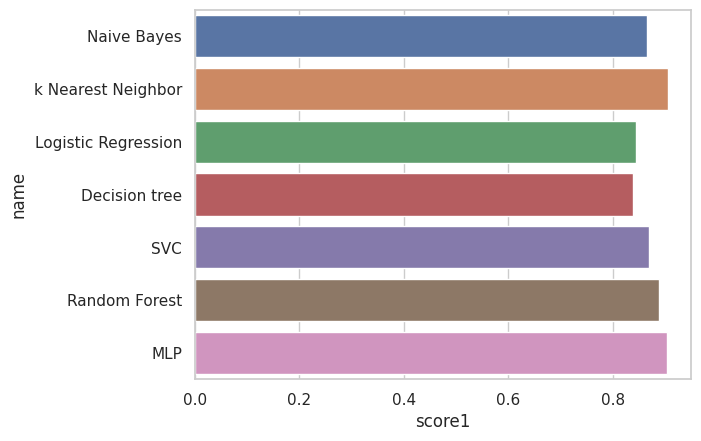

In [39]:
df_sc7=pd.DataFrame()
scores1=[gnb_f1[0], knn_f1[0], lreg_f1[0], dec_f1[0], svc_f1[0], rndf_f1[0], mlp_f1[0]]
scores2=[gnb_f1[1], knn_f1[1], lreg_f1[1], dec_f1[1], svc_f1[1], rndf_f1[1], mlp_f1[1]]
names=['Naive Bayes', 'k Nearest Neighbor','Logistic Regression', 'Decision tree', 'SVC',  'Random Forest', 'MLP']
df_sc7['name']=names
df_sc7['score1']=scores1
df_sc7['score2']=scores2
sns.set(style='whitegrid')
ax=sns.barplot(y="name", x="score1", data=df_sc7)

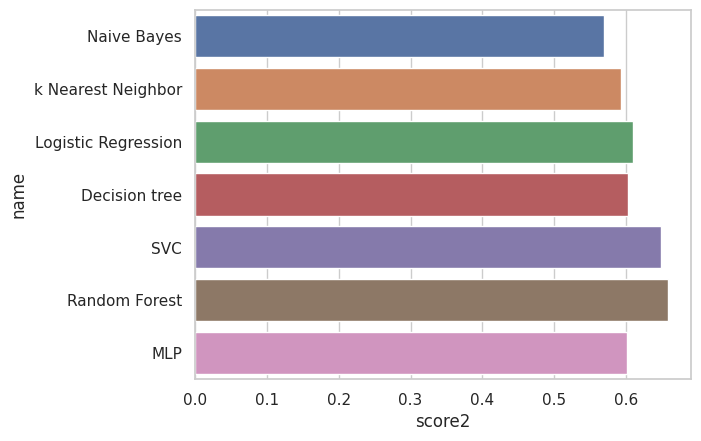

In [40]:
ax=sns.barplot(y="name", x="score2", data=df_sc7)

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [40]:
rndf_best=RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_depth= None, min_samples_leaf= 10, min_samples_split= 2, n_estimators= 70)
rndf_best.fit(df_valid[[column for column in col if column !='RainTomorrow']], np.ravel(df_valid['RainTomorrow']))
pred_rndf_test_7 = rndf_best.predict(df_test_valid)
pred_rndf_test_7 = pred_rndf_test_7.astype(int)
print("Labels' prediction SVC",pred_rndf_test_7[:10])

Labels' prediction SVC [0 0 0 1 0 0 0 1 1 0]


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [43]:
my_pred_7=pd.DataFrame(pred_rndf_test_7, columns=['RainTomorrow'])
my_pred_7.insert(0, 'id', range(1, len(my_pred_7) + 1))
print(my_pred_7.head(5))
print(my_pred_7.shape)
file_path = '/content/drive/MyDrive/Dataset/my_pred_rndf_7.csv'

#np.savetxt(file_path, my_pred, delimiter=',', fmt='%d')
my_pred_7.to_csv(file_path, header=True, index=False)

   id  RainTomorrow
0   1             0
1   2             0
2   3             0
3   4             1
4   5             0
(9699, 2)
